In [1]:
import sys
 
sys.path.append('C:\\Users\\Nikhil\\Developer\\Data_Science_Projects')
from common_ds_modules import missing_values, data_manipulation, modeling, eda
import os
import pandas as pd
import numpy as np
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)

from sklearn.compose import make_column_selector as selector
from scipy.stats import skew

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isna().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

May have to drop Cabin as a variable, as there are so many missing values

#### Survival Distribution

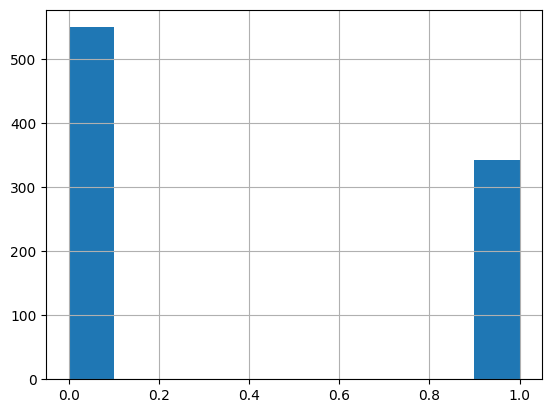

In [4]:
train['Survived'].hist()
plt.show()

In [5]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Slightly over 1/3 survive, would be interesting trying to use SMOTE to balance the population

#### PClass Distribution

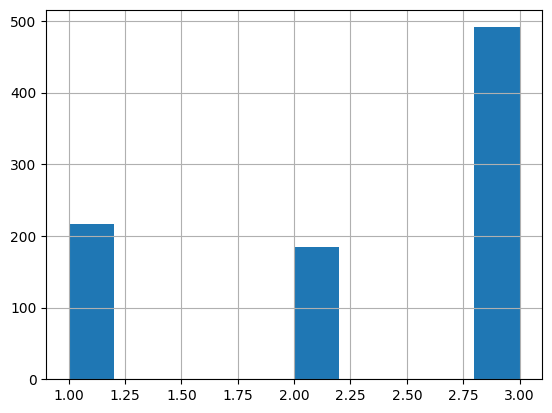

In [6]:
train['Pclass'].hist()
plt.show()

In [7]:
pclass_survivability = pd.crosstab(train['Pclass'], train['Survived'])
pclass_survivability['class_survival_rate'] = pclass_survivability[1]/(pclass_survivability[1] + pclass_survivability[0])
pclass_survivability['class_survival_rate']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: class_survival_rate, dtype: float64

### PClass Survivability

In [8]:
pclass_survivability

Survived,0,1,class_survival_rate
Pclass,,,
1,80,136,0.629630
2,97,87,0.472826
3,372,119,0.242363


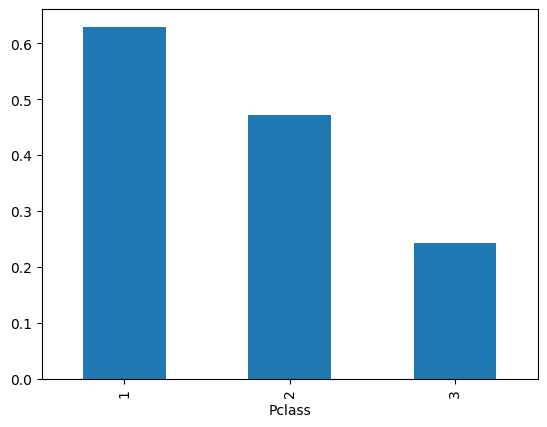

In [9]:
pclass_survivability['class_survival_rate'].plot.bar()
plt.show()

In [10]:
for name, sex in zip(train['Name'].values[:20], train['Sex'].values[:20]):
    print(f'Name: {name}, sex: {sex}')

Name: Braund, Mr. Owen Harris, sex: male
Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer), sex: female
Name: Heikkinen, Miss. Laina, sex: female
Name: Futrelle, Mrs. Jacques Heath (Lily May Peel), sex: female
Name: Allen, Mr. William Henry, sex: male
Name: Moran, Mr. James, sex: male
Name: McCarthy, Mr. Timothy J, sex: male
Name: Palsson, Master. Gosta Leonard, sex: male
Name: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg), sex: female
Name: Nasser, Mrs. Nicholas (Adele Achem), sex: female
Name: Sandstrom, Miss. Marguerite Rut, sex: female
Name: Bonnell, Miss. Elizabeth, sex: female
Name: Saundercock, Mr. William Henry, sex: male
Name: Andersson, Mr. Anders Johan, sex: male
Name: Vestrom, Miss. Hulda Amanda Adolfina, sex: female
Name: Hewlett, Mrs. (Mary D Kingcome) , sex: female
Name: Rice, Master. Eugene, sex: male
Name: Williams, Mr. Charles Eugene, sex: male
Name: Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele), sex: female
Name: Masselmani, Mrs. Fatima, sex: fe

In [11]:
for name in zip(train['Name'].values[:20]):
    print(f'Name: {name}')

Name: ('Braund, Mr. Owen Harris',)
Name: ('Cumings, Mrs. John Bradley (Florence Briggs Thayer)',)
Name: ('Heikkinen, Miss. Laina',)
Name: ('Futrelle, Mrs. Jacques Heath (Lily May Peel)',)
Name: ('Allen, Mr. William Henry',)
Name: ('Moran, Mr. James',)
Name: ('McCarthy, Mr. Timothy J',)
Name: ('Palsson, Master. Gosta Leonard',)
Name: ('Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',)
Name: ('Nasser, Mrs. Nicholas (Adele Achem)',)
Name: ('Sandstrom, Miss. Marguerite Rut',)
Name: ('Bonnell, Miss. Elizabeth',)
Name: ('Saundercock, Mr. William Henry',)
Name: ('Andersson, Mr. Anders Johan',)
Name: ('Vestrom, Miss. Hulda Amanda Adolfina',)
Name: ('Hewlett, Mrs. (Mary D Kingcome) ',)
Name: ('Rice, Master. Eugene',)
Name: ('Williams, Mr. Charles Eugene',)
Name: ('Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',)
Name: ('Masselmani, Mrs. Fatima',)


In [12]:
def is_married(x):
    return 'mrs.' in x['Name'].lower() and x['Sex'] == 'female'

In [13]:
'(' in train['Name'].values[1].split(', ')[1] and ')' in train['Name'].values[1].split(', ')[1]

True

In [14]:
def get_title(x):
    return x.split(', ')[1].split(' ')[0]

In [15]:
def kept_maiden_name(x):
    return '(' in x['Name'].split(', ')[1] and ')' in x['Name'].split(', ')[1] and x['title'] == 'Mrs.'

In [16]:
train['is_married'] = train.apply(lambda x: is_married(x), axis='columns')

In [17]:
train['title'] = train['Name'].apply(lambda x: get_title(x))

In [18]:
train['kept_maiden_name'] = train.apply(lambda x: kept_maiden_name(x), axis='columns')

In [19]:
train[train['title'] == 'Mrs.']['kept_maiden_name'].value_counts()

kept_maiden_name
True     121
False      4
Name: count, dtype: int64

In [20]:
train['is_married'].value_counts()

is_married
False    766
True     125
Name: count, dtype: int64

In [21]:
train.shape[0] - (517 + 182 + 125 + 40)

27

In [22]:
train['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [23]:
'Lady.' in ['Mr.', 'Miss.']

False

In [24]:
def convert_title(title):
    if title not in ['Mr.', 'Miss.', 'Mrs.', 'Master']:
        return 'other'
    else:
        return title

In [25]:
train['title_converted'] = train['title'].apply(lambda x: convert_title(x) )

### Title Survivability

In [26]:
train['title_converted'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'other'], dtype=object)

In [27]:
title_survivability = pd.crosstab(train['title_converted'], train['Survived'])
title_survivability['class_survival_rate'] = title_survivability[1]/(title_survivability[1] + title_survivability[0])
title_survivability['class_survival_rate']

title_converted
Miss.    0.697802
Mr.      0.156673
Mrs.     0.792000
other    0.522388
Name: class_survival_rate, dtype: float64

### Survival Rate vs Sex

In [28]:
pclass_survivability = pd.crosstab(train['Pclass'], train['Survived'])
pclass_survivability['class_survival_rate'] = pclass_survivability[1]/(pclass_survivability[1] + pclass_survivability[0])
pclass_survivability['class_survival_rate']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: class_survival_rate, dtype: float64

In [29]:
train['sex_converted'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [30]:
sex_survivability = pd.crosstab(train['sex_converted'], train['Survived'])
sex_survivability['sex_survival_rate'] = sex_survivability[1]/(sex_survivability[1] + sex_survivability[0])
sex_survivability

Survived,0,1,sex_survival_rate
sex_converted,,,
0,81,233,0.742038
1,468,109,0.188908


In [31]:
def get_sex_pclass(row):
    if row['Pclass'] == 1 and row['sex_converted'] == 0:
        return 'pclass_1_female'
    elif row['Pclass'] == 2 and row['sex_converted'] == 0:
        return 'pclass_2_female'
    elif row['Pclass'] == 3 and row['sex_converted'] == 0:
        return 'pclass_3_female'
    elif row['Pclass'] == 1 and row['sex_converted'] == 1:
        return 'pclass_1_male'
    elif row['Pclass'] == 2 and row['sex_converted'] == 1:
        return 'pclass_2_male'
    else:
        return'pclass_3_male'

In [32]:
train['sex_pclass'] = train.apply(lambda row: get_sex_pclass(row), axis='columns')

In [33]:
sex_pclass_survivability = pd.crosstab(train['sex_pclass'], train['Survived'])
sex_pclass_survivability['sex_pclass_survival_rate'] = sex_pclass_survivability[1]/(sex_pclass_survivability[1] + sex_pclass_survivability[0])
sex_pclass_survivability

Survived,0,1,sex_pclass_survival_rate
sex_pclass,,,
pclass_1_female,3,91,0.968085
pclass_1_male,77,45,0.368852
pclass_2_female,6,70,0.921053
pclass_2_male,91,17,0.157407
pclass_3_female,72,72,0.500000
pclass_3_male,300,47,0.135447


In [34]:
train["pclass_1_female"] = (train['Pclass'] == 1) & (train["sex_converted"] == 0)
train["pclass_2_female"] = (train['Pclass'] == 2) & (train["sex_converted"] == 0)
train["pclass_3_female"] = (train['Pclass'] == 3) & (train["sex_converted"] == 0)

train["pclass_1_male"] = (train['Pclass'] == 1) & (train["sex_converted"] == 1)
train["pclass_2_male"] = (train['Pclass'] == 2) & (train["sex_converted"] == 1)
train["pclass_3_male"] = (train['Pclass'] == 3) & (train["sex_converted"] == 1)

In [37]:
train.groupby(['Sex', 'Pclass'])['Survived'].mean().to_frame()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### Age Survivability

In [42]:
train.groupby('Survived')['Age'].mean(), train.groupby('Survived')['Age'].std()

(Survived
 0    30.626179
 1    28.343690
 Name: Age, dtype: float64,
 Survived
 0    14.172110
 1    14.950952
 Name: Age, dtype: float64)

In [44]:
train['age_group'] = pd.cut(train['Age'], [0,18,29,45,60,1000], labels=[0, 1, 2, 3, 4])

In [45]:
train.groupby(['age_group'])['Survived'].mean().to_frame()

,Survived
age_group,
0,0.503597
1,0.351020
2,0.422907
3,0.407407
4,0.227273


In [46]:
train['age_binary'] = train['Age'].apply(lambda x: 1 if x < 30 else 0)

In [47]:
train.groupby(['age_binary'])['Survived'].mean().to_frame()

,Survived
age_binary,
0,0.366864
1,0.406250


In [48]:
train[train['age_group'] == 0]['Age'].describe()

count    139.000000
mean      10.717050
std        6.465828
min        0.420000
25%        4.000000
50%       13.000000
75%       17.000000
max       18.000000
Name: Age, dtype: float64

In [49]:
import seaborn as sns

In [54]:
from matplotlib.pyplot import figure

figure(figsize=(2, 2))

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

C:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

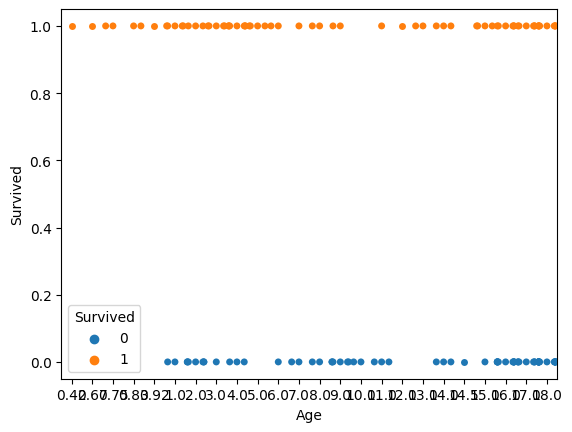

In [55]:
age_group_0 = train[train['age_group'] == 0]

sns.swarmplot(data=age_group_0, x='Age', y='Survived', hue='Survived')
plt.show()

In [53]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
age_group_survivability = pd.crosstab(train['age_group'], train['Survived'])
age_group_survivability['age_group_survival_rate'] = age_group_survivability[1]/(age_group_survivability[1] + age_group_survivability[0])
age_group_survivability

0-29 Survivability: 70%
30+ survivability: 40%

In [ ]:
70+86/(70+86+69+159)

In [ ]:
(96 + 33 + 5)/(131 + 48 + 17 + 96 + 33 + 5)

In [ ]:
train['Parch'].hist()
plt.show()

In [ ]:
train['SibSp'].hist()
plt.show()

In [ ]:
train['family_size'] = train['Parch'] + train['SibSp'] + 1 # to include yourself

In [ ]:
train['family_size'].hist()
plt.show()

In [ ]:
train['solo_traveler'] = train['family_size'].apply(lambda x: 1 if x == 1 else 0)
train['solo_traveler'].value_counts()


In [ ]:
solo_survivability = pd.crosstab(train['solo_traveler'], train['Survived'])
solo_survivability['solo_survival_rate'] = solo_survivability[1]/(solo_survivability[1] + solo_survivability[0])
solo_survivability

Traveling solo, drastically increases survival rate, you don't have anyone else to look after

In [ ]:
train.columns

Assuming ticket prefixes don't matter

### Fare Survivability

In [ ]:
train['Fare'].hist()
plt.show()

In [ ]:
train[train['Fare'] == 0].shape[0]

In [ ]:
train['fare_group'], fare_bins = pd.qcut(train['Fare'], 5, labels=[0, 1, 2, 3, 4], retbins=True)

In [ ]:
fare_bins

In [ ]:
fare_group_survivability = pd.crosstab(train['fare_group'], train['Survived'])
fare_group_survivability['fare_group_survival_rate'] = fare_group_survivability[1]/(fare_group_survivability[1] + fare_group_survivability[0])
fare_group_survivability

In [ ]:
fare_bins

### Embarked Survivability

In [ ]:
embarked_survivability = pd.crosstab(train['Embarked'], train['Survived'])
embarked_survivability['embarked_survival_rate'] = embarked_survivability[1]/(embarked_survivability[1] + embarked_survivability[0])
embarked_survivability

In [ ]:
def get_cabin(row):
    if pd.isnull(row):
        return None
    else:
        return row[0]

Not enough information to do anything with this

### Processing Cabin

In [ ]:
train['cabin_prefix'] = train['Cabin'].apply(lambda x: get_cabin(x))
train['cabin_prefix'].value_counts()

In [ ]:
train.groupby('cabin_prefix')['Fare'].mean().sort_values()

In [ ]:
train['Cabin'].value_counts()

### Processing Ticket

Getting ticket prefix

In [ ]:
train['ticket_prefix'] = train['Ticket'].apply(lambda x: x.split(' ')[0] if ' ' in x else 'NONE')

In [ ]:
def get_ticket_info(row):
    has_code = False
    for i in row:
        if i.isalpha():
            has_code = True
    return has_code
        

In [ ]:
train['ticket_code'] = train['Ticket'].apply(lambda row: get_ticket_info(row))

In [ ]:
train['ticket_code'].value_counts()

All ticket prefixes

In [ ]:
train[train['ticket_code'] == True]['ticket_prefix'].unique()

There are multiple passengers with the same ticket number

In [ ]:
train[train['ticket_code'] == False]['Ticket'].value_counts()

Really isn't too big of a difference between ticket prefix and Fare

In [ ]:
ticket_code_present = train[train['ticket_code'] == True]
ticket_code_present.groupby('ticket_prefix')['Fare'].mean().sort_values()

In [ ]:
ticket_code_present['ticket_prefix'].value_counts()

In [ ]:
train['ticket_prefix_cleaned'] = train.apply(lambda row: row['ticket_prefix']\
                                      .replace('.', '').replace('/', '') if row['ticket_code'] else row['ticket_prefix'], axis='columns')

In [ ]:
train['Ticket'] = train['Ticket'].replace({'LINE': 'LINE 000'})

### Duplicate ticket counts plot

In [ ]:
ticket_counts = train['Ticket'].value_counts().reset_index()
ticket_counts['count'].hist(bins=20)

In [ ]:
train['ticket_numeric'] = train['Ticket'].apply(lambda x: x.split()[1] if ' ' in x else x)

In [ ]:
train['ticket_numeric_length'] = train['ticket_numeric'].apply(lambda x: len(x))
train['ticket_numeric_length'].value_counts()

In [ ]:
ticket_group_sizes = pd.DataFrame(train['Ticket'].value_counts()).reset_index()
ticket_group_sizes = ticket_group_sizes.rename(columns={'count': 'ticket_group_size'})
ticket_group_sizes

In [ ]:
train = train.merge(ticket_group_sizes, on='Ticket')

In [ ]:
def get_num_cabins(x):
    global errors
    if not pd.isnull(x):
        try:
            return len(x.split(' '))
        except:
            #print(f"Cabins {x}")
            errors.add(x)
    else:
        return None

In [ ]:
errors = set()
train["num_cabins"] = train["Cabin"].apply(lambda x: get_num_cabins(x))

In [ ]:
def describe(data, variable, quantiles):
    desc_df = pd.DataFrame(data[variable].describe()).reset_index().rename(columns={"index": "percentile"})
    extra_data = list()
    for q in quantiles:
        extra = dict()
        extra = {"percentile": f"{q*100}%", f"{variable}": data[variable].quantile(q)}
        extra_data.append(extra)
        
    extra_data_df = pd.DataFrame(extra_data)
    desc_df = pd.concat([desc_df, extra_data_df], ignore_index=True)
        
    return desc_df

1 cabin: <= 2 ticket group size

2 cabin: 3 or 4 ticket group size, and family size <= 4 

3 cabin: 3 or 4 ticket group size, and family size >= 5

4 cabin all the others

In [ ]:
train.columns

If you are a solo traveler, with ticket_group_size more than 1, that means you just ordered teh ticket together, but you are still solo travelers

In [ ]:
solo_travelers = train[train['solo_traveler'] == True]
solo_travelers[solo_travelers['ticket_group_size'] > 1][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size', 'Fare']]

3 brothers travelling with 2 friends in ticket number 14879

In [ ]:
train[train['ticket_group_size'] == 5][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size', 'Fare', 'family_size']]

### INSIGHT KAGGLE COMPETITION SET DATA UP POORLY

can't really use family size or ticket group size to predict survivability, train tells you which ticket groups are most likely to survive, which is cheating on the test data, since you already have that information

In [ ]:
for n in [1, 2, 3, 4]:
    print(f"Ticket Group size distribution for {n} cabins")
    n_cabins = train[train["num_cabins"] == n]
    desc_df = describe(n_cabins, "ticket_group_size", [0.8, 0.85, 0.9, 0.95, 0.99])
    display(desc_df)

### Filling in number of cabins

In [ ]:
def get_num_cabins_empty(row):
    if not pd.isnull(row['num_cabins']):
        return row["num_cabins"]
    else:
        if row["ticket_group_size"] <= 2:
            return 1
        elif row["ticket_group_size"] > 2 and row["ticket_group_size"] < 5 and row["family_size"] <= 4: 
            return 2
        elif row["ticket_group_size"] > 2 and row["ticket_group_size"] < 5 and row["family_size"] >= 5:
            return 3
        else:
            return 4

In [ ]:
train["num_cabins"] = train.apply(lambda row: get_num_cabins(row), axis='columns')

In [ ]:
train["Cabin"].isna().sum()

In [ ]:
train["num_cabins"].isna().sum()

In [ ]:
missing_cabins = train[pd.isnull(train["Cabin"])]
missing_cabins['num_cabins'].hist()

In [ ]:
train.columns

In [ ]:
missing_cabins[missing_cabins['ticket_group_size'] > 4].shape[0]

### EDA on base features

In [ ]:
train.columns

In [ ]:
df_survived_dead = pd.concat([survived, dead], axis='index')
df_survived_dead.shape

In [ ]:
def bar_chart_stacked(dataset, feature, stacked=True):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ['Survived', 'Dead']
    df_survived_dead.plot(kind='bar', stacked=stacked, figsize=(5,5))
    plt.show()

In [ ]:
train['Survived'].value_counts(normalize=True)

In [ ]:
train.groupby(['Pclass']).Survived.mean().to_frame()

In [ ]:
bar

In [ ]:
train.groupby(['Sex', 'Pclass']).Survived.mean().to_frame()

In [ ]:
bar_chart_stacked(train, 'Survived')